**Faiss: A library for efficient similarity search**
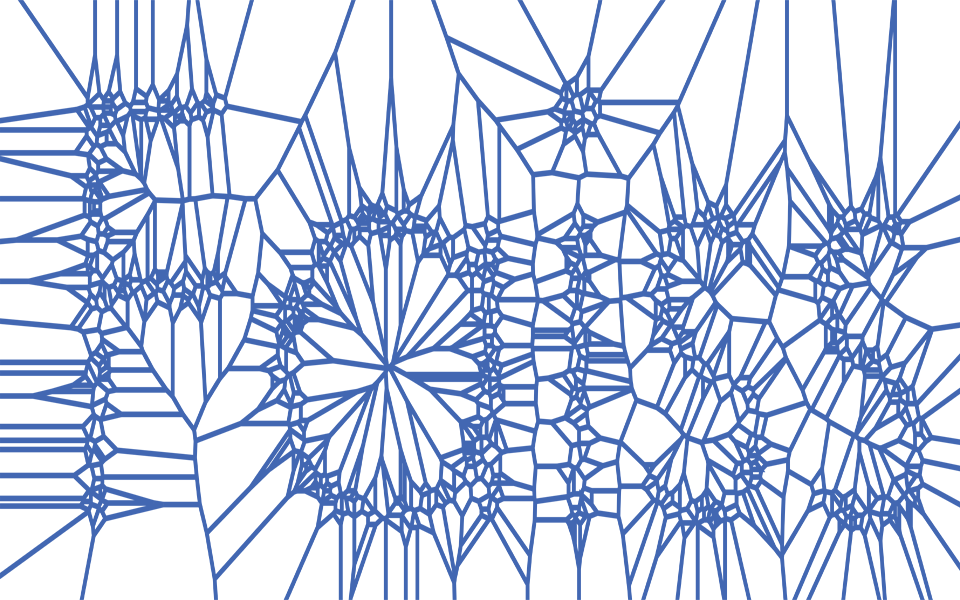

In [ ]:
pip install faiss-cpu

     |████████████████████████████████| 8.2MB 10.7MB/s 


In [ ]:
# to connect with google drive
from google.colab import drive

# this will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# to import required libraries
import numpy as np
import pandas as pd
import faiss 
import time
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import tensorflow as tf
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import faiss
from matplotlib import pyplot as plt

In [ ]:
# Defining 50 layer residual network : ResNet50 trained on million images, to get features for our dataset.
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))

#Extracting features of images by including image path and model trained above
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
#Trying to extract features for all type of image formats specified. We are getting numerical vectors for images.
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list
root_dir = '/content/drive/My Drive/ADM-A3/Dataset'
filenames = sorted(get_file_list(root_dir))

In [ ]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
feature_list=np.array(feature_list)

In [ ]:

feature_list.shape

(550, 100352)

In [ ]:
dimension = 100352                       
n = len(filenames)                    
np.random.seed(1)             
db_vectors = feature_list

In [ ]:
db_vectors.shape

(550, 100352)

In [ ]:
nlist = 1 
quantiser = faiss.IndexFlatL2(dimension)  
index = faiss.IndexIVFFlat(quantiser, dimension, nlist,   faiss.METRIC_L2)

In [ ]:
index.train(db_vectors)  # train on the database vectors
index.add(db_vectors)   # add the vectors and update the index

In [ ]:
print(index.ntotal)

550


In [ ]:
nprobe = 1  # find 2 most similar clusters
n_query = 550  
k = 10  # return 3 nearest neighbours
np.random.seed(0)   
query_vectors = feature_list#np.random.random((n_query, dimension)).astype('float32')
distances, indices = index.search(query_vectors, k)

In [ ]:
distances

array([[0.        , 0.5871368 , 0.84356904, ..., 1.009279  , 1.085913  ,
        1.1133599 ],
       [0.        , 0.05672523, 1.1131829 , ..., 1.2819107 , 1.2861766 ,
        1.3349882 ],
       [0.        , 0.05672523, 1.0857644 , ..., 1.259837  , 1.2732437 ,
        1.3374825 ],
       ...,
       [0.        , 0.        , 1.3503623 , ..., 1.4287752 , 1.4364662 ,
        1.4370925 ],
       [0.        , 0.        , 0.90449107, ..., 1.1489252 , 1.1982001 ,
        1.2322005 ],
       [0.        , 0.        , 1.3762854 , ..., 1.4202961 , 1.4319023 ,
        1.4326383 ]], dtype=float32)

In [ ]:
len(distances)

550

In [ ]:
indices

array([[  0, 447,   3, ..., 274, 277,  59],
       [  1,   2, 405, ..., 145, 315, 119],
       [  2,   1, 405, ..., 315, 145,  47],
       ...,
       [547, 546,  50, ..., 265, 251, 231],
       [548, 191, 161, ..., 208, 326, 449],
       [192, 549, 411, ..., 449, 161, 481]])

In [ ]:

faiss.write_index(index,"vector.index")  # save the index to 
# diskindex = faiss.read_index("vector.index")  # load the index

In [ ]:
diskindex = faiss.read_index("vector.index")

In [ ]:
feature_list.shape

(550, 100352)

In [ ]:

pickle.dump(feature_list, open('features-caltech101-resnet.pickle', 'wb'))
pickle.dump(filenames, open('filenames-caltech101.pickle','wb'))

In [ ]:
filenames = pickle.load(open('filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('features-caltech101-resnet.pickle', 'rb'))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
filenames

['/content/drive/My Drive/ADM-A3/Dataset/1000699_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/101332_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/101332_1.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/102427_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1024602_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1040854_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1046233_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1046349_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1046349_1.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1054120_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1056039_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1056039_1.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1056039_2.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1056039_3.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1056223_0.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1056223_1.jpg',
 '/content/drive/My Drive/ADM-A3/Dataset/1062123_0.jpg',
 '/content/drive/My Drive/ADM-A3/D

In [ ]:

filename1 = [i.split('/')[-1] for i in filenames]

In [ ]:
filename1

['1000699_0.jpg',
 '101332_0.jpg',
 '101332_1.jpg',
 '102427_0.jpg',
 '1024602_0.jpg',
 '1040854_0.jpg',
 '1046233_0.jpg',
 '1046349_0.jpg',
 '1046349_1.jpg',
 '1054120_0.jpg',
 '1056039_0.jpg',
 '1056039_1.jpg',
 '1056039_2.jpg',
 '1056039_3.jpg',
 '1056223_0.jpg',
 '1056223_1.jpg',
 '1062123_0.jpg',
 '1062123_1.jpg',
 '1076893_0.jpg',
 '1076893_1.jpg',
 '1078824_0.jpg',
 '1080191_0.jpg',
 '1080191_1.jpg',
 '1092339_0.jpg',
 '1108438_0.jpg',
 '1108503_0.jpg',
 '110899_0.jpg',
 '1131012_0.jpg',
 '1131012_1.jpg',
 '1138838_0.jpg',
 '1140265_0.jpg',
 '1158718_0.jpg',
 '1158718_1.jpg',
 '1166708_0.jpg',
 '1170894_0.jpg',
 '1170894_1.jpg',
 '1174936_0.jpg',
 '1180015_0.jpg',
 '1180015_1.jpg',
 '118313_0.jpg',
 '119506_0.jpg',
 '1196521_0.jpg',
 '1199966_0.jpg',
 '1199966_1.jpg',
 '1199966_2.jpg',
 '1199966_3.jpg',
 '1202550_0.jpg',
 '1204454_0.jpg',
 '1211240_0.jpg',
 '1211240_1.jpg',
 '1212545_0.jpg',
 '1217793_0.jpg',
 '1217793_1.jpg',
 '1217793_2.jpg',
 '1217793_3.jpg',
 '124438_0.jpg',

In [ ]:
index = []
for i in range(len(filenaam)):
  index.append(i)

In [ ]:
index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
df = pd.DataFrame()
df['images'] = filename1

In [ ]:
df

,images
0,1000699_0.jpg
1,101332_0.jpg
2,101332_1.jpg
3,102427_0.jpg
4,1024602_0.jpg
...,...
545,971996_0.jpg
546,989685_0.jpg
547,989685_1.jpg
548,9905_0.jpg


In [ ]:
indices_df = pd.DataFrame(indices)
indices_df

,0,1,2,3,4,5,6,7,8,9
0,0,447,3,541,9,287,20,274,277,59
1,1,2,405,254,146,367,128,145,315,119
2,2,1,405,254,146,367,128,315,145,47
3,3,447,0,440,274,277,392,304,243,138
4,4,352,353,545,197,409,374,31,393,176
...,...,...,...,...,...,...,...,...,...,...
545,545,4,57,458,495,253,353,352,197,299
546,547,546,50,203,263,419,503,265,251,231
547,547,546,50,203,263,419,503,265,251,231
548,548,191,161,479,411,347,310,208,326,449


In [ ]:
df1 = df.to_dict()
df1 = df1['images']

In [ ]:
df1

{0: '1000699_0.jpg',
 1: '101332_0.jpg',
 2: '101332_1.jpg',
 3: '102427_0.jpg',
 4: '1024602_0.jpg',
 5: '1040854_0.jpg',
 6: '1046233_0.jpg',
 7: '1046349_0.jpg',
 8: '1046349_1.jpg',
 9: '1054120_0.jpg',
 10: '1056039_0.jpg',
 11: '1056039_1.jpg',
 12: '1056039_2.jpg',
 13: '1056039_3.jpg',
 14: '1056223_0.jpg',
 15: '1056223_1.jpg',
 16: '1062123_0.jpg',
 17: '1062123_1.jpg',
 18: '1076893_0.jpg',
 19: '1076893_1.jpg',
 20: '1078824_0.jpg',
 21: '1080191_0.jpg',
 22: '1080191_1.jpg',
 23: '1092339_0.jpg',
 24: '1108438_0.jpg',
 25: '1108503_0.jpg',
 26: '110899_0.jpg',
 27: '1131012_0.jpg',
 28: '1131012_1.jpg',
 29: '1138838_0.jpg',
 30: '1140265_0.jpg',
 31: '1158718_0.jpg',
 32: '1158718_1.jpg',
 33: '1166708_0.jpg',
 34: '1170894_0.jpg',
 35: '1170894_1.jpg',
 36: '1174936_0.jpg',
 37: '1180015_0.jpg',
 38: '1180015_1.jpg',
 39: '118313_0.jpg',
 40: '119506_0.jpg',
 41: '1196521_0.jpg',
 42: '1199966_0.jpg',
 43: '1199966_1.jpg',
 44: '1199966_2.jpg',
 45: '1199966_3.jpg',
 46:

In [ ]:
indices_df

,0,1,2,3,4,5,6,7,8,9
0,0,447,3,541,9,287,20,274,277,59
1,1,2,405,254,146,367,128,145,315,119
2,2,1,405,254,146,367,128,315,145,47
3,3,447,0,440,274,277,392,304,243,138
4,4,352,353,545,197,409,374,31,393,176
...,...,...,...,...,...,...,...,...,...,...
545,545,4,57,458,495,253,353,352,197,299
546,547,546,50,203,263,419,503,265,251,231
547,547,546,50,203,263,419,503,265,251,231
548,548,191,161,479,411,347,310,208,326,449


In [ ]:
indices_df = indices_df.replace(df1)
indices_df

,0,1,2,3,4,5,6,7,8,9
0,1000699_0.jpg,634439_0.jpg,102427_0.jpg,969013_0.jpg,1054120_0.jpg,2194226_0.jpg,1078824_0.jpg,2128367_0.jpg,2153201_0.jpg,1260869_0.jpg
1,101332_0.jpg,101332_1.jpg,454575_1.jpg,2035896_0.jpg,1590116_1.jpg,34762_2.jpg,1496852_0.jpg,1590116_0.jpg,251394_3.jpg,144525_2.jpg
2,101332_1.jpg,101332_0.jpg,454575_1.jpg,2035896_0.jpg,1590116_1.jpg,34762_2.jpg,1496852_0.jpg,251394_3.jpg,1590116_0.jpg,1204454_0.jpg
3,102427_0.jpg,634439_0.jpg,1000699_0.jpg,593186_1.jpg,2128367_0.jpg,2153201_0.jpg,428087_0.jpg,228851_0.jpg,2018843_0.jpg,155579_1.jpg
4,1024602_0.jpg,328944_0.jpg,328944_1.jpg,971996_0.jpg,1833356_0.jpg,464681_0.jpg,359078_0.jpg,1158718_0.jpg,43354_0.jpg,1719926_0.jpg
...,...,...,...,...,...,...,...,...,...,...
545,971996_0.jpg,1024602_0.jpg,1258869_0.jpg,698597_0.jpg,805537_1.jpg,2034696_1.jpg,328944_1.jpg,328944_0.jpg,1833356_0.jpg,2248498_0.jpg
546,989685_1.jpg,989685_0.jpg,1212545_0.jpg,1855762_0.jpg,20730_1.jpg,49335_1.jpg,833884_0.jpg,20730_3.jpg,2032401_2.jpg,1985202_1.jpg
547,989685_1.jpg,989685_0.jpg,1212545_0.jpg,1855762_0.jpg,20730_1.jpg,49335_1.jpg,833884_0.jpg,20730_3.jpg,2032401_2.jpg,1985202_1.jpg
548,9905_0.jpg,181781_0.jpg,1629131_0.jpg,755747_0.jpg,469757_0.jpg,316035_0.jpg,238697_1.jpg,189586_0.jpg,270183_0.jpg,656645_0.jpg


In [ ]:

# This cell is Only for Google Colab
from google.colab import files
indices_df.to_csv('FaissOutput.csv')
files.download('FaissOutput.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

for i in range(5):
    print(distances[0][i])

0.0
0.5871368
0.84356904
0.85026985
0.9167132


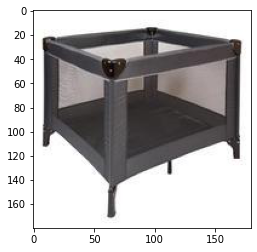

In [ ]:
plt.imshow(mpimg.imread(filenames[98]))

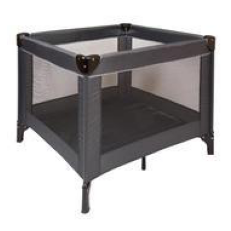

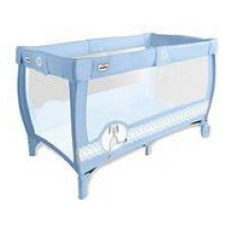

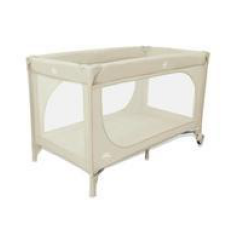

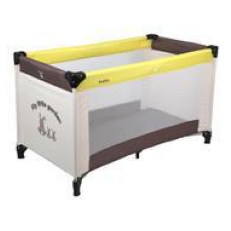

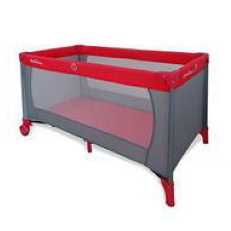

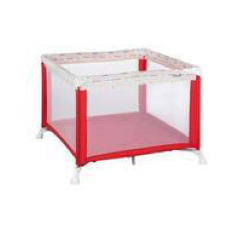

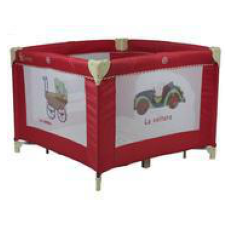

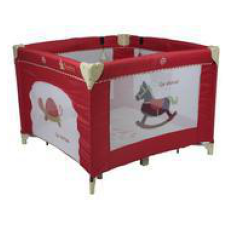

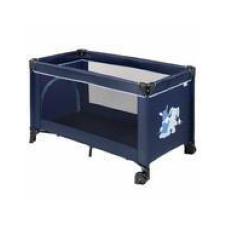

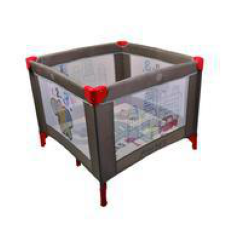

In [ ]:

for i in range(indices.shape[1]):
  plt.imshow(mpimg.imread(filenames[indices[98][i]]))
  plt.axis('off')
  plt.show()